# MNIST 손글씨 데이터 가져오기
- MNIST  : Modified National Institute of Standards and Technology database

## 구글 드라이브 마운트

In [20]:
import os
from google.colab import drive

mount_point = './mnt'
drive.mount(mount_point)

Drive already mounted at ./mnt; to attempt to forcibly remount, call drive.mount("./mnt", force_remount=True).


In [21]:
mount_path = os.path.abspath('./mnt')
print(mount_path)

/content/mnt


In [22]:
data_path = os.path.join(mount_path, 'My Drive/Colab Notebooks/data/mnist/')
print(data_path)

/content/mnt/My Drive/Colab Notebooks/data/mnist/


## 데이터 저장 디렉토리 생성

In [23]:
if not os.path.exists(data_path):
    os.makedirs(data_path)

## 데이터 가져오기
 - 파이썬 wget 패키지 설치 : `! pip install wget`
 - 참조 : 리눅스 wget을 사용한 파일 가져오기 방법   
  `!wget https://pjreddie.com/media/files/mnist_train.csv`  
`!wget https://pjreddie.com/media/files/mnist_test.csv` 



In [24]:
! pip install wget

In [25]:
import wget
import shutil

file = ['mnist_train.csv', 'mnist_test.csv']
for f in file:
    url = "https://pjreddie.com/media/files/" + f
    wget.download(url)
    shutil.move(f, data_path + f)

In [26]:
for file in os.listdir(data_path):
    if 'csv' in file :
        print(f'{file : <20} {os.path.getsize(data_path + file) / 1000000: ,.2f} MB')

mnist_train.csv       109.58 MB
mnist_test.csv        18.29 MB


## MNIST 데이터를 Pandas 데이터프레임으로 읽어오기

In [27]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(data_path + 'mnist_train.csv', header=None)

In [28]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784
0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,147,252,42,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 785 entries, 0 to 784
dtypes: int64(785)
memory usage: 359.3 MB


In [30]:
print(df[0].value_counts())

1    6742
7    6265
3    6131
2    5958
9    5949
0    5923
6    5918
8    5851
4    5842
5    5421
Name: 0, dtype: int64


In [31]:
print(df[100].unique())

[  0 147 166 246 191  70 214  43  64   7  50 151 222  23 255 116  25 138
  80 251 195 253  97  89  88  68  96 181 224 254 179 203  16 237  38 239
  47 169 238   4 171 216 125   9  79  34 190 126 226 220 120 172  52 119
  24  62   8 196  54 141 154 182 233  28 124  67 198  20   2  86 118 228
 131 240  37 137  57 128 159  94 212  60 252 102 157 155 170 236 114  92
 188  32 192 209  11 117  42  22 174 231 243  99   3 248  31 235 244 206
 144 130  18  10 230 161   6  58 221  59 160 176 232  91  53  72  82  19
  41 199  26 163 227 110 167  81 111  71   5 122 158  65  36 123 193  56
 139 134 208 105  46 140 183  98 152 101 112  44  84 108  85 177 200 234
 103  35 201 197  87 146 113 223 133 149  78 148  13 211  51 225 215 156
 186  29 178  75  73 162 106 115 121 100 132 229  61 210   1 107 127  76
  95  40 250 165 187  33  17 241  66  12 184 164 247 135 153  77 245  21
 185 109  14  63  83  30  93 150 173 194 249 145  90  27 218 180  45 104
 143 219 217 242 202  48 213 175 142 204  49 205 16

## 데이터 보기

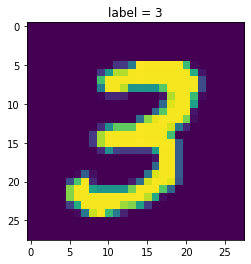

In [32]:
# 7번째 행(row) 데이터 선택
row = 7
data = df.iloc[row]

# label data : 0번째 열(column) 데이터
label = data[0]

# image data : 1 ~ 784번째 열(column) 데이터
img = data[1:].values.reshape(28,28)
plt.title("label = " + str(label))
plt.imshow(img)
plt.show()

In [33]:
colormap = sorted(m for m in plt.cm.datad)
print(colormap)

['Accent', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'Dark2', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'Paired', 'Pastel1', 'Pastel2', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Set1', 'Set2', 'Set3', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'tab10', 'tab20', 'tab20b', 'tab20c', 'terrain', 'winter']


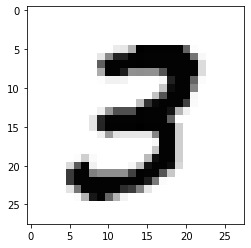

In [34]:
plt.imshow(img, cmap='Greys')
plt.show()